In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
df = pd.read_csv("data/Telangana.csv", encoding='ISO-8859-1',low_memory=False)

df

,CORPORATE_IDENTIFICATION_NUMBER,Company_Name,Company_status,Company_class,Company_Category,Company_sub_category,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,Industrial_Class,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,Registered_Office_Address,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,Latest_Year_AR,Latest_Year_BS
0,L01110TG1994PLC018562,ASIAN FLORA LIMITED,Active,Public,Company limited by Shares,Non-govt company,19-10-94,Telangana,67500000.0,38809000.0,1110,"Agriculture, hunting and related service activ...","H.No. 1-8-364, Soap Factory Lane Chikkadapally...",RoC-Hyderabad,cs.asainflora@gmail.com,31-03-19,31-03-19
1,L01113TG1994PLC018750,SCARLET FLOWERS AND AGRITECH LIMITED,Not Available for eFiling,Public,Company limited by Shares,Non-govt company,15-11-94,Telangana,100000000.0,48215000.0,1113,"Agriculture, hunting and related service activ...","6-1-71, LAKDI KA POOLHYDERABAD A.P. A.P. , Unc...",RoC-Hyderabad,NaN,NaN,NaN
2,L01119TG1990PLC011554,NATURITE AGRO PRODUCTS LIMITED,Active,Public,Company limited by Shares,Non-govt company,06-08-90,Telangana,60000000.0,52960000.0,1119,"Agriculture, hunting and related service activ...","Sy.No. 711-713, Lalgadi Malakpet (V), Shamirpe...",RoC-Hyderabad,naturiteinvestors@gmail.com,31-03-20,31-03-20
3,L01119TG1992PLC082816,OMEGA AG SEEDS PUNJAB LIMITED,Active,Public,Company limited by Shares,Non-govt company,24-11-92,Telangana,250000000.0,79040000.0,1119,"Agriculture, hunting and related service activ...","6-3-1099/1/2/3, Flat No. 203,Bhavya's Varun Sa...",RoC-Hyderabad,info@omegaagriseeds.com,31-03-19,31-03-19
4,L01120TG1986PLC006728,KAVERI SEED COMPANY LTD.,Active,Public,Company limited by Shares,Non-govt company,27-08-86,Telangana,200000000.0,120658266.0,1120,"Agriculture, hunting and related service activ...","513B,5TH FLOOR,MINERVA COMPLEX, SAROJINI DEVI ...",RoC-Hyderabad,cs@kaveriseeds.in,31-03-20,31-03-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123696,U99999TG2005PTC055232,BIPASHA RELTORS PVT LTD,Active,Private,Company limited by Shares,Non-govt company,18-11-05,Telangana,500000.0,100000.0,99999,Extraterritorial organizations and bodies,"FLAT NO.606, 6TH FLOOR, KARAN CENTRE, S. D. RO...",RoC-Hyderabad,prredyy_93@yahoo.co.in,31-03-13,31-03-13
123697,U99999TG9999PLC048204,VISION DRUGS PRIVATE LIMITED,Active,Public,Company limited by Shares,Non-govt company,28-11-05,Telangana,70000000.0,46737000.0,99999,Extraterritorial organizations and bodies,"H.NO. 8-2-686/6/D/6, ROAD NO.12 BANJARA HILLS ...",RoC-Hyderabad,accounts@visiondrugs.co.in,31-03-20,31-03-20
123698,U5209TG1987PTC007859,SRI VENKATESWARA MOULDINGS PVT LTD,Strike Off,Private,Company limited by Shares,Non-govt company,13-10-87,Telangana,200000.0,0.0,5209,Unclassified,"1-8-522 /20C, CHIKKAKPALLYHYDERABAD , Unclassi...",RoC-Hyderabad,NaN,NaN,NaN
123699,U52520TG2009PTC006708,GUARD MARKETING ENTERPRISES PVT. LTD.,Strike Off,Private,Company limited by Shares,Non-govt company,NaN,Telangana,1500000.0,242000.0,52520,"Retail trade, except of motor vehicles and mot...","BLOCK NO.36, C- FLOOR, UNITY HOUSE, ABIDS HYDE...",RoC-Hyderabad,NaN,NaN,NaN


### DATE_OF_REGISTRATION is changed to Registration_Year

In [12]:
# Filter out rows with unknown or invalid values in 'DATE_OF_REGISTRATION'
df = df[pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True).notna()]

# Convert 'DATE_OF_REGISTRATION' to datetime format
df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True)

# Extract year from the registration date
df['Registration_Year'] = df['DATE_OF_REGISTRATION'].dt.year

C:\Users\kings\AppData\Local\Temp\ipykernel_120\3959083845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True)
C:\Users\kings\AppData\Local\Temp\ipykernel_120\3959083845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Registration_Year'] = df['DATE_OF_REGISTRATION'].dt.year


In [13]:
# Check for missing values
df.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER               0
Company_Name                                  0
Company_status                                0
Company_class                                 3
Company_Category                              4
Company_sub_category                          5
DATE_OF_REGISTRATION                          0
REGISTERED_STATE                              0
AUTHORIZED_CAP                                0
PAIDUP_CAPITAL                                0
Industrial_Class                              0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        0
Registered_Office_Address                     0
REGISTRAR_OF_COMPANIES                        0
EMAIL_ADDR                                22249
Latest_Year_AR                            59880
Latest_Year_BS                            59817
Registration_Year                             0
dtype: int64

In [6]:
df=df.drop(['DATE_OF_REGISTRATION','EMAIL_ADDR'],axis=1)
df

,CORPORATE_IDENTIFICATION_NUMBER,Company_Name,Company_status,Company_class,Company_Category,Company_sub_category,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,Industrial_Class,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,Registered_Office_Address,REGISTRAR_OF_COMPANIES,Latest_Year_AR,Latest_Year_BS,Registration_Year
0,L01110TG1994PLC018562,ASIAN FLORA LIMITED,Active,Public,Company limited by Shares,Non-govt company,Telangana,67500000.0,38809000.0,1110,"Agriculture, hunting and related service activ...","H.No. 1-8-364, Soap Factory Lane Chikkadapally...",RoC-Hyderabad,31-03-19,31-03-19,1994
1,L01113TG1994PLC018750,SCARLET FLOWERS AND AGRITECH LIMITED,Not Available for eFiling,Public,Company limited by Shares,Non-govt company,Telangana,100000000.0,48215000.0,1113,"Agriculture, hunting and related service activ...","6-1-71, LAKDI KA POOLHYDERABAD A.P. A.P. , Unc...",RoC-Hyderabad,NaN,NaN,1994
2,L01119TG1990PLC011554,NATURITE AGRO PRODUCTS LIMITED,Active,Public,Company limited by Shares,Non-govt company,Telangana,60000000.0,52960000.0,1119,"Agriculture, hunting and related service activ...","Sy.No. 711-713, Lalgadi Malakpet (V), Shamirpe...",RoC-Hyderabad,31-03-20,31-03-20,1990
3,L01119TG1992PLC082816,OMEGA AG SEEDS PUNJAB LIMITED,Active,Public,Company limited by Shares,Non-govt company,Telangana,250000000.0,79040000.0,1119,"Agriculture, hunting and related service activ...","6-3-1099/1/2/3, Flat No. 203,Bhavya's Varun Sa...",RoC-Hyderabad,31-03-19,31-03-19,1992
4,L01120TG1986PLC006728,KAVERI SEED COMPANY LTD.,Active,Public,Company limited by Shares,Non-govt company,Telangana,200000000.0,120658266.0,1120,"Agriculture, hunting and related service activ...","513B,5TH FLOOR,MINERVA COMPLEX, SAROJINI DEVI ...",RoC-Hyderabad,31-03-20,31-03-20,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123694,U99999TG2001PLC036315,PROTOCOL TECHNOLOGIES LIMITED,Strike Off,Public,Company limited by Shares,Non-govt company,Telangana,1000000.0,0.0,99999,Extraterritorial organizations and bodies,"FLAT NO.102, SV MEERA MANSIONDHARAMKARAM RD, A...",RoC-Hyderabad,NaN,NaN,2001
123695,U99999TG2002PLC039658,KAARYAKSHETHRAM TECHNOLOGIES LIMITED,Strike Off,Public,Company limited by Shares,Non-govt company,Telangana,500000.0,0.0,99999,Extraterritorial organizations and bodies,"MIG-35, APHB COLONY,9TH PHASE, KUKATPALLY, HYD...",RoC-Hyderabad,NaN,NaN,2002
123696,U99999TG2005PTC055232,BIPASHA RELTORS PVT LTD,Active,Private,Company limited by Shares,Non-govt company,Telangana,500000.0,100000.0,99999,Extraterritorial organizations and bodies,"FLAT NO.606, 6TH FLOOR, KARAN CENTRE, S. D. RO...",RoC-Hyderabad,31-03-13,31-03-13,2005
123697,U99999TG9999PLC048204,VISION DRUGS PRIVATE LIMITED,Active,Public,Company limited by Shares,Non-govt company,Telangana,70000000.0,46737000.0,99999,Extraterritorial organizations and bodies,"H.NO. 8-2-686/6/D/6, ROAD NO.12 BANJARA HILLS ...",RoC-Hyderabad,31-03-20,31-03-20,2005


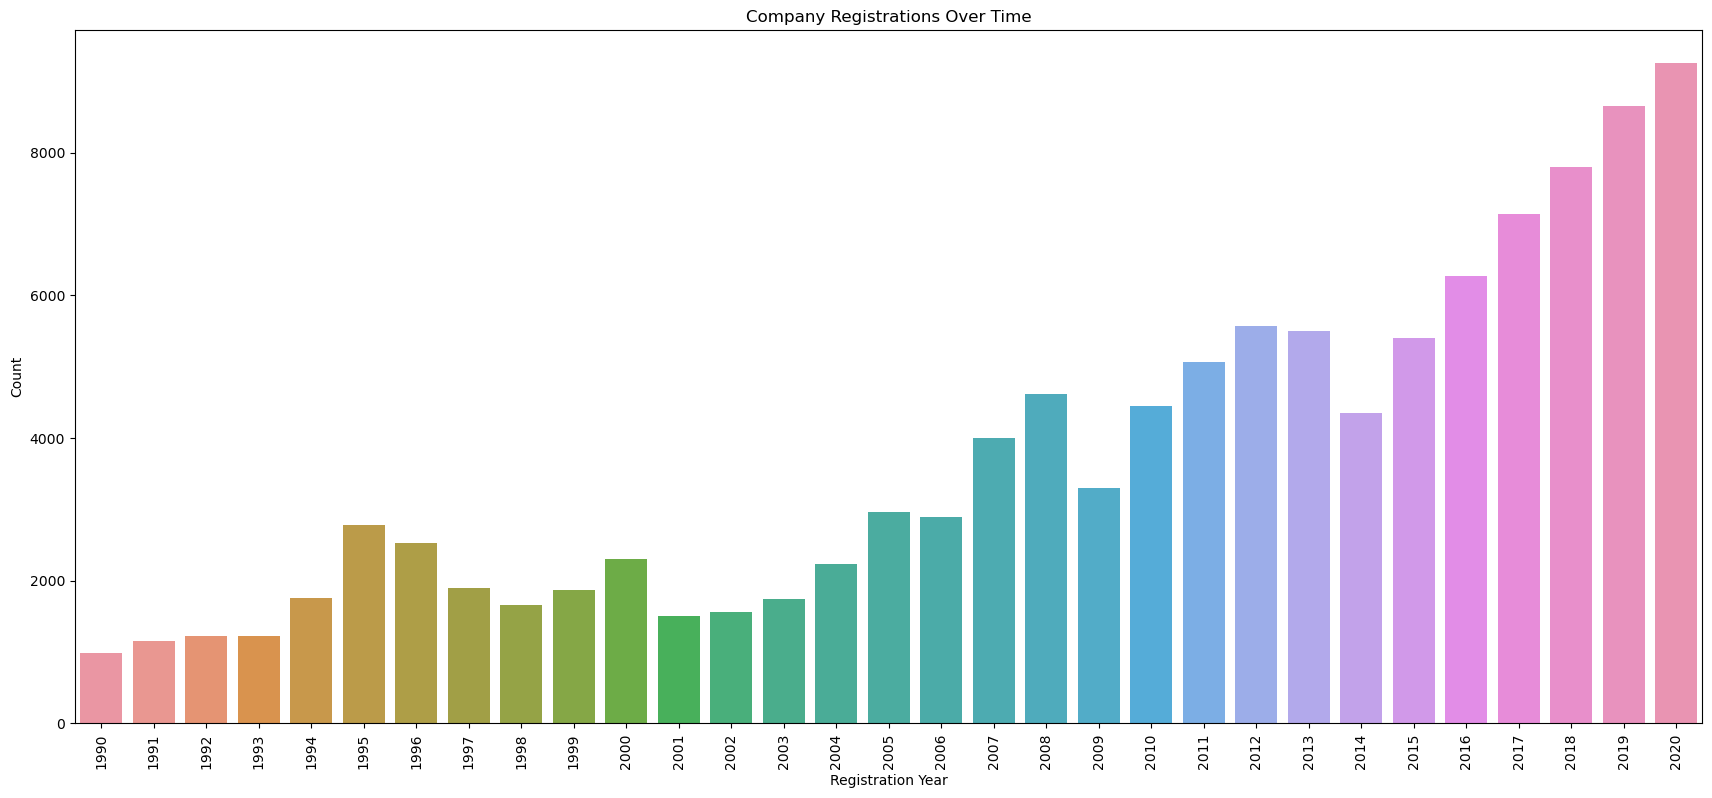

In [14]:
# EDA - Trends over time
plt.figure(figsize=(21, 9))
sns.countplot(x='Registration_Year', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Company Registrations Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

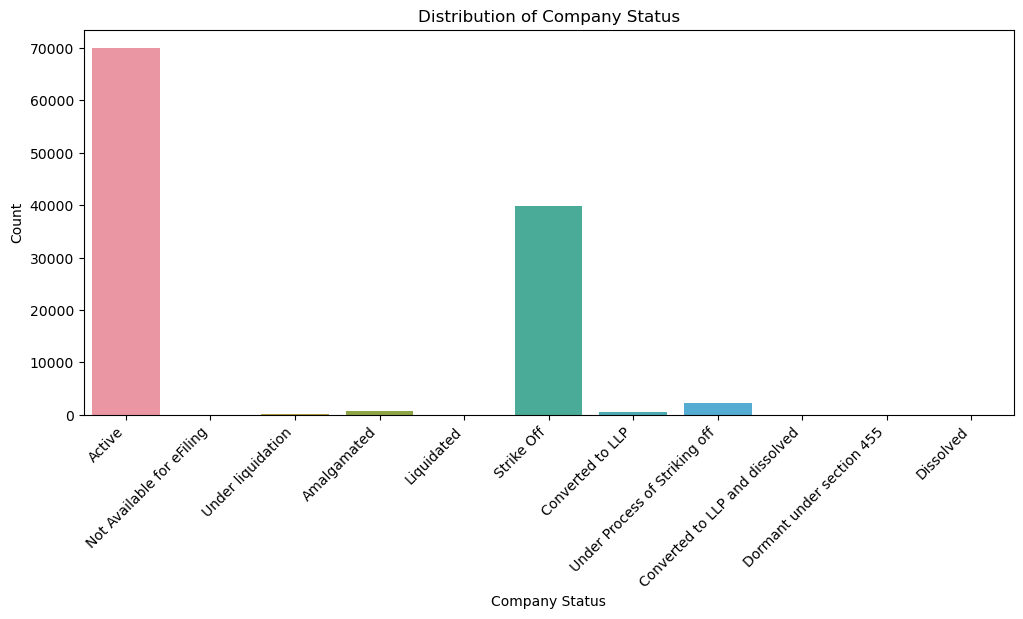

In [15]:
# EDA - Company Status
plt.figure(figsize=(12, 5))
sns.countplot(x='Company_status', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Status')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

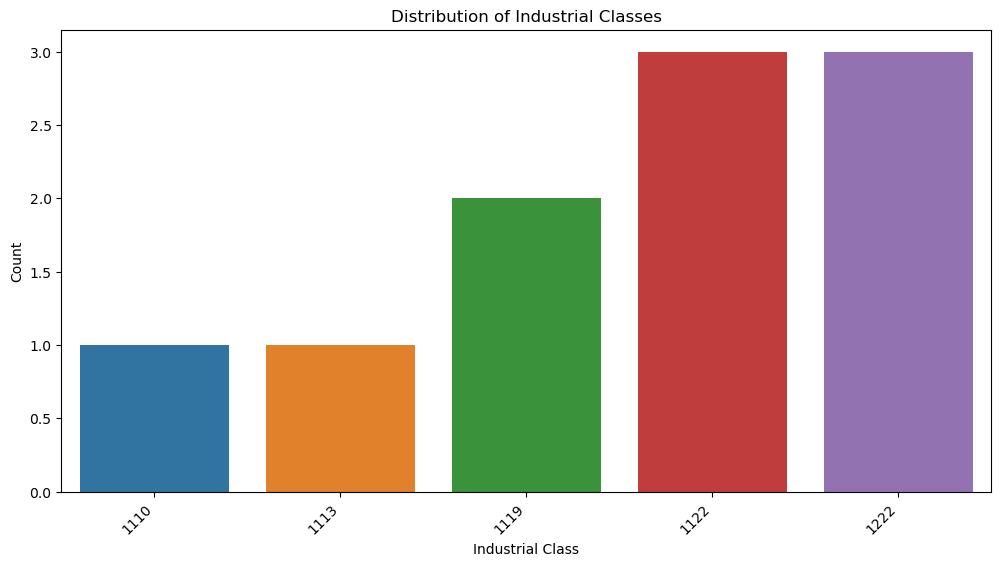

In [16]:
# EDA - Industrial Class Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Industrial_Class', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)].head(10))
plt.title('Distribution of Industrial Classes')
plt.xlabel('Industrial Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

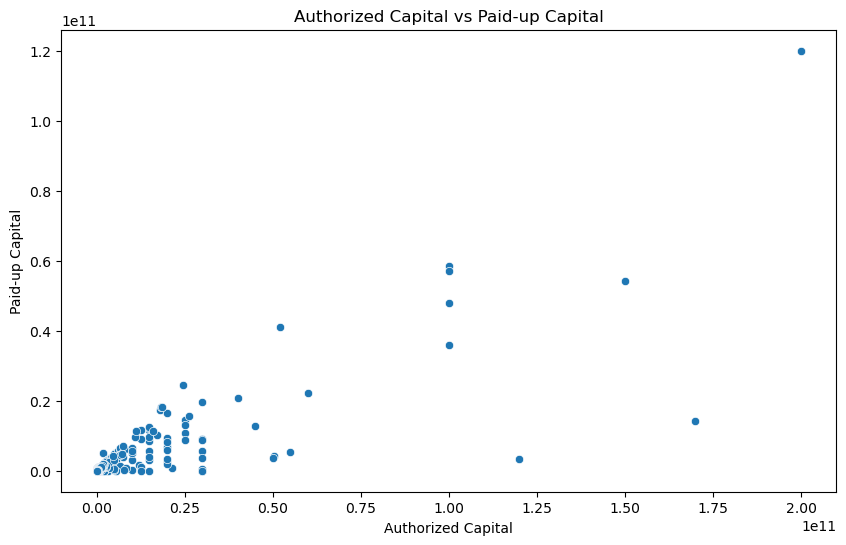

In [17]:
# EDA - Relationship between Authorized Capital and Paid-up Capital
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AUTHORIZED_CAP', y='PAIDUP_CAPITAL', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Authorized Capital vs Paid-up Capital')
plt.xlabel('Authorized Capital')
plt.ylabel('Paid-up Capital')
plt.show()

In [18]:
# Print the unique values in the 'Company_Category' column
print(df['Company_Category'].unique())

['Company limited by Shares' 'Company Limited by Guarantee'
 'Unlimited Company' nan]


In [19]:
df['Company_Category'] =df['Company_Category'].replace(' ',np.nan)

C:\Users\kings\AppData\Local\Temp\ipykernel_120\3290827023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company_Category'] =df['Company_Category'].replace(' ',np.nan)


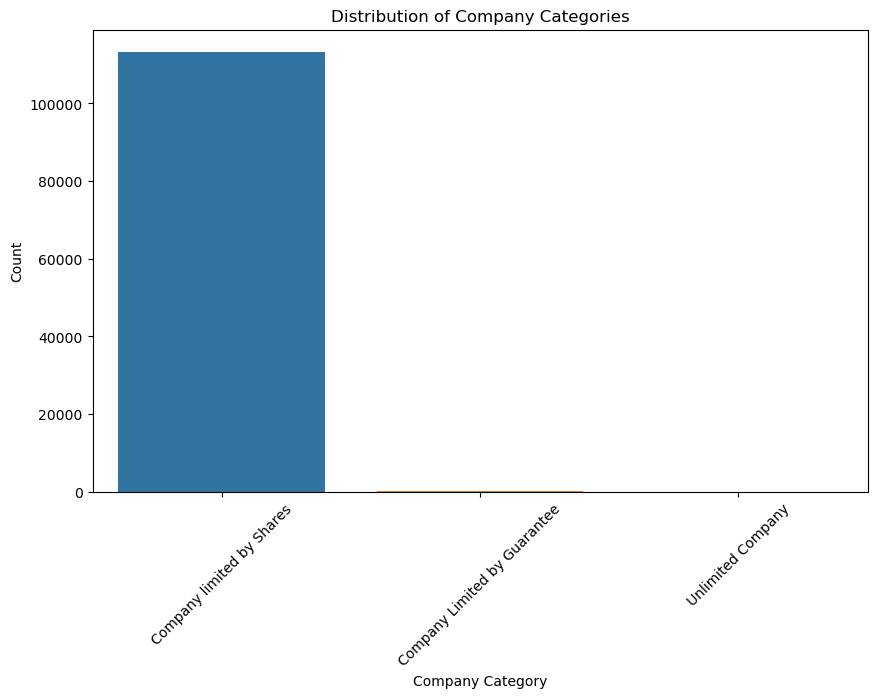

In [20]:
# EDA - Distribution of Company Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Company_Category', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Categories')
plt.xlabel('Company Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

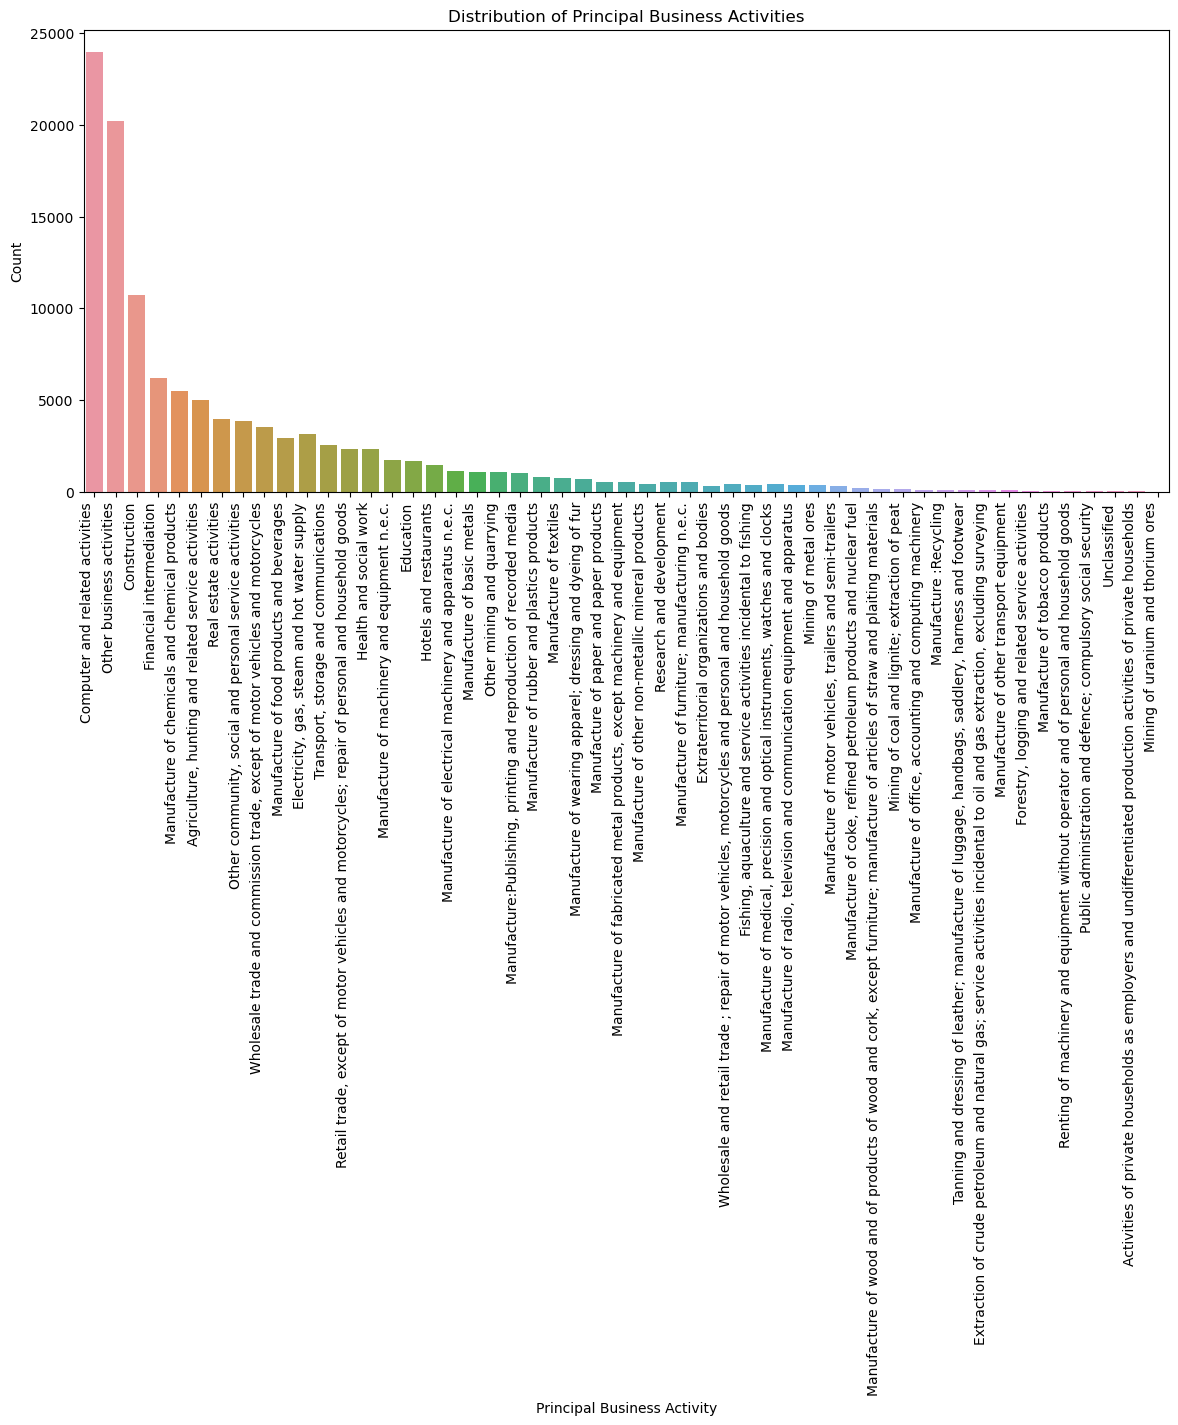

In [21]:
# EDA - Distribution of Principal Business Activities
plt.figure(figsize=(14, 6))
sns.countplot(x='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)], order=df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().index)
plt.title('Distribution of Principal Business Activities')
plt.xlabel('Principal Business Activity')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

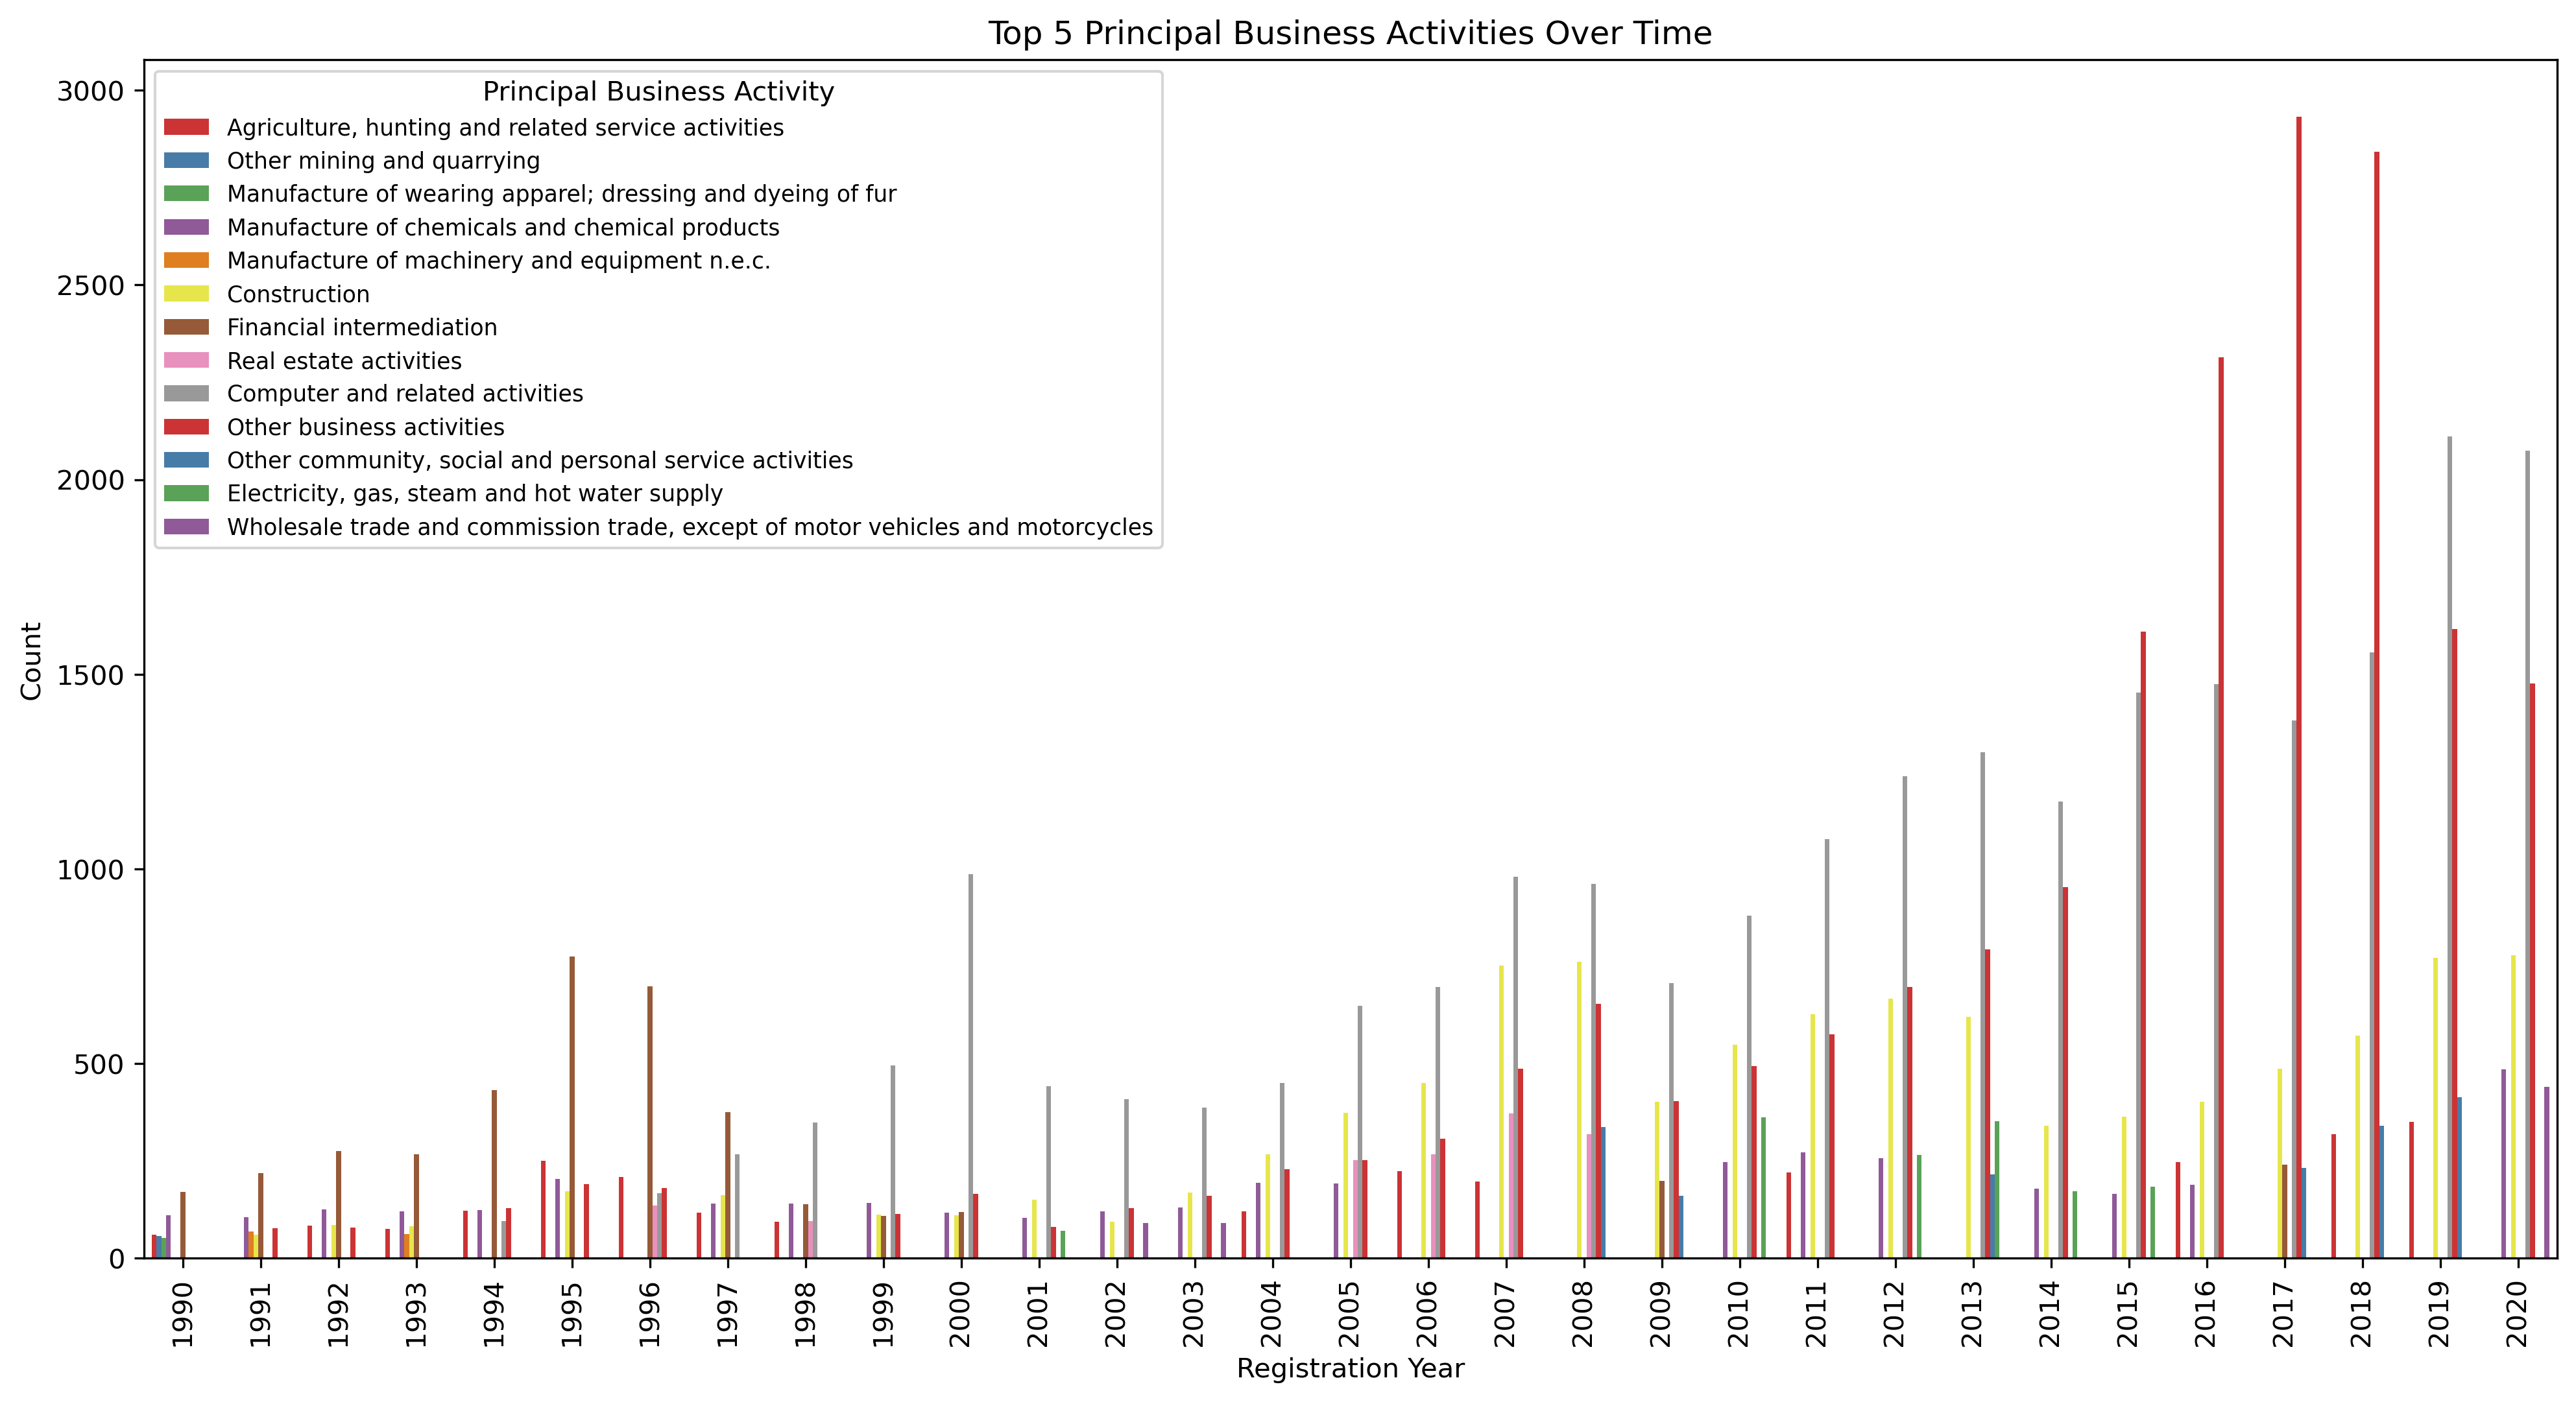

In [22]:
# Find the top 5 business activities for each year
top_activities = df.loc[(df['Registration_Year']>=1990) & (df['Registration_Year'] <= 2020)].groupby('Registration_Year')['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].apply(lambda x: x.value_counts().nlargest(5).index.tolist())

# Filter the dataframe to include only the top activities
df_top_activities = df[df.apply(lambda x: x['Registration_Year'] in top_activities.index and x['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] in top_activities.loc[x['Registration_Year']], axis=1)]

plt.figure(figsize=(16, 8),dpi=300)
sns.countplot(x='Registration_Year', hue='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df_top_activities, palette='Set1')
plt.title('Top 5 Principal Business Activities Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Principal Business Activity', fontsize='small')
plt.show()

In [23]:
# Filter companies registered between 2013 and 2020
filtered_df = df[(df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

# Get the top 5 business activities
top_business_activities = filtered_df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().head(5)

# Print the result
print("Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:")
print(top_business_activities)

Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:
Other business activities                              14538
Computer and related activities                        12524
Construction                                            4335
Agriculture, hunting and related service activities     1970
Manufacture of chemicals and chemical products          1890
Name: PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN, dtype: int64


In [24]:
# Convert columns to appropriate data types
# Use .loc to ensure you're modifying the original DataFrame
df.loc[:, 'AUTHORIZED_CAP'] = df['AUTHORIZED_CAP'].astype(float)
df.loc[:, 'PAIDUP_CAPITAL'] = df['PAIDUP_CAPITAL'].astype(float)

C:\Users\kings\AppData\Local\Temp\ipykernel_120\1307078230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'AUTHORIZED_CAP'] = df['AUTHORIZED_CAP'].astype(float)
C:\Users\kings\AppData\Local\Temp\ipykernel_120\1307078230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'PAIDUP_CAPITAL'] = df['PAIDUP_CAPITAL'].astype(float)


In [25]:
# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'AUTHORIZED_CAP' and 'PAIDUP_CAPITAL'
grouped_df = df.groupby('PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN')[['AUTHORIZED_CAP', 'PAIDUP_CAPITAL']].mean().reset_index()

### Authorized and Paid up capital:
- Authorized Capital: Authorized capital, also known as authorized share capital, authorized stock, or authorized capital stock, refers to the maximum amount of share capital that a company is legally allowed to issue as stated in its memorandum of association or its articles of incorporation.
    - “Allowed to issue” in terms of authorized capital means that a company has the legal permission to issue a certain number of shares up to the maximum limit set by its authorized capital. This limit is specified in the company’s constitutional documents, such as the memorandum of association1. The company can issue shares up to this limit to raise funds from shareholders.
    
    
- Issued Capital: However, the actual number of shares issued, known as issued capital, may be less than the authorized limit to provide flexibility for future financing needs or to maintain control over the company’s ownership. This is the total value of shares that a company has actually issued to shareholders. It represents the portion of the authorized capital that has been allocated to shareholders and may include both fully paid and partially paid shares


- Paid-Up Capital: This is the amount of issued capital that shareholders have fully paid for. It does not include any portion of the issued capital that remains unpaid.

(Partially paid shares are shares that have been issued by a company to shareholders who have paid only a portion of the issue price upfront. The remaining amount can be paid in installments when the company makes a call for further payment123.

This arrangement is useful for both the company and the investor:

For the company, it allows them to secure capital immediately while giving them the flexibility to call for the remaining funds as needed for growth or operations.
For the investor, it provides the opportunity to invest without committing the full amount upfront, which can be beneficial if the investor does not have all the funds available immediately or prefers to spread out the financial commitment.
The rights of partially paid shareholders are generally the same as those of fully paid shareholders, including the right to receive dividends, vote at shareholders’ meetings, and participate in the winding up of the company. However, the rights to dividends and voting may be proportional to the amount paid in.)

In [26]:
# Trend analysis of Authorized capital
# Ensure the DataFrame is sorted by the time column
df = df.sort_values(by='Registration_Year')

# Calculate the percentage change in authorized capital for each activity over time
df['CAPITAL_CHANGE'] = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', 'Registration_Year'])['AUTHORIZED_CAP'].pct_change().fillna(0)

# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'CAPITAL_CHANGE'
activity_trend_df = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN','Registration_Year'])['CAPITAL_CHANGE'].mean().reset_index()

# Print the new DataFrame with the trend analysis
activity_trend_df2= activity_trend_df.interpolate()
activity_trend_df2

,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,Registration_Year,CAPITAL_CHANGE
0,Activities of private households as employers ...,1998,0.000000
1,Activities of private households as employers ...,1999,0.000000
2,Activities of private households as employers ...,2003,0.000000
3,Activities of private households as employers ...,2012,4.500000
4,Activities of private households as employers ...,2013,0.000000
...,...,...,...
2288,"Wholesale trade and commission trade, except o...",2021,3.803182
2289,"Wholesale trade and commission trade, except o...",2057,179.500000
2290,"Wholesale trade and commission trade, except o...",2068,-0.300000
2291,"Wholesale trade and commission trade, except o...",2070,-0.475000


#### Comparison Score

In [28]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Activity_1', 'Activity_2', 'Comparison'])

# Comparative Analysis: This compares the mean paid-up capital of all business activities.
# It helps in understanding their relative performance and market standing.
for i in range(len(grouped_df) - 1):
    for j in range(i + 1, len(grouped_df)):
        activity1_capital = grouped_df.loc[i, 'PAIDUP_CAPITAL']
        activity2_capital = grouped_df.loc[j, 'PAIDUP_CAPITAL']
        comparison = activity1_capital / activity2_capital
        new_row = pd.DataFrame({'Activity_1': [grouped_df.loc[i, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Activity_2': [grouped_df.loc[j, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Comparison': [comparison]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print the results DataFrame
results_df

,Activity_1,Activity_2,Comparison
0,Activities of private households as employers ...,"Agriculture, hunting and related service activ...",0.653839
1,Activities of private households as employers ...,Computer and related activities,0.862165
2,Activities of private households as employers ...,Construction,0.168515
3,Activities of private households as employers ...,Education,1.624469
4,Activities of private households as employers ...,"Electricity, gas, steam and hot water supply",0.014774
...,...,...,...
1270,"Transport, storage and communications",Wholesale and retail trade ; repair of motor v...,1.754349
1271,"Transport, storage and communications","Wholesale trade and commission trade, except o...",3.880539
1272,Unclassified,Wholesale and retail trade ; repair of motor v...,0.377908
1273,Unclassified,"Wholesale trade and commission trade, except o...",0.835916


#### Liquidity Ratios

In [29]:
# Liquidity Ratios: This calculates the liquidity ratio (authorized capital to paid-up capital) for each company.
# It is crucial for assessing the financial health of a company.
# Make sure 'df' is the original DataFrame or explicitly create a copy if it's a subset
df = df.copy()

# Calculate the liquidity ratio without warnings
df.loc[:, 'LIQUIDITY_RATIO'] = df['AUTHORIZED_CAP'] / df['PAIDUP_CAPITAL']

# Now, let's create a smaller DataFrame to showcase the liquidity ratios
# Selecting relevant columns for the smaller DataFrame
liquidity_df = df[['Company_Name', 'AUTHORIZED_CAP', 'PAIDUP_CAPITAL', 'LIQUIDITY_RATIO']].copy()

# Displaying the smaller DataFrame
print("Smaller DataFrame showcasing Liquidity Ratios:")
liquidity_df

Smaller DataFrame showcasing Liquidity Ratios:


,Company_Name,AUTHORIZED_CAP,PAIDUP_CAPITAL,LIQUIDITY_RATIO
102471,KEDIA ASBESTOS LTD.,200000.0,35000.0,5.714286
27417,TANT CAP ELECTRONICS LTD,5750000.0,0.0,inf
25508,B R BROTHERS TOOLS PVT LTD,500000.0,280000.0,1.785714
27418,SECURITY ELECTRONICS PVT LTD,1600000.0,100000.0,16.000000
11299,MILLET MALTS AND BEVERAGES PVT LTD,600000.0,0.0,inf
...,...,...,...,...
52805,KRISHNA INSTITUTE OF MEDICAL SCIENCESLIMITED,950000000.0,775932830.0,1.224333
52806,VIKRANTI HOTELS PVT LTD,1500000.0,0.0,inf
52807,PAIGAH HOUSE HOTELS PRIVATE LIMITED,15000000.0,936200.0,16.022217
24304,JINDAL STEEL TUBES LIMITED,20000000.0,13142530.0,1.521777


# Model

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

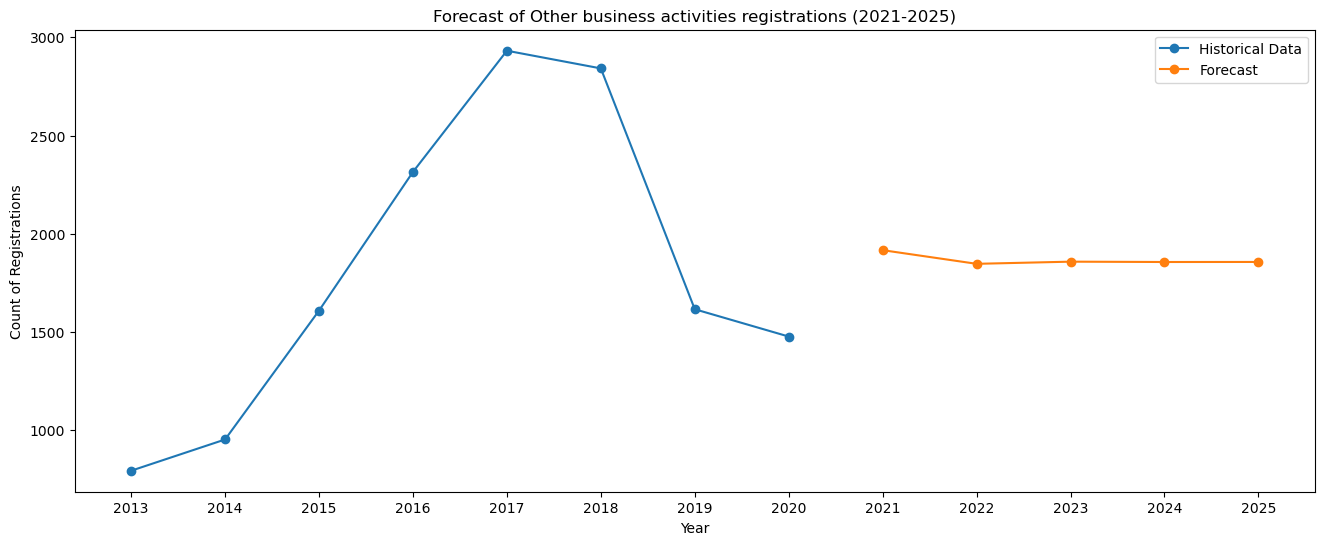

Forecasted registrations for Other business activities for 2021-2025:
2021-01-01    1916.736214
2022-01-01    1847.220225
2023-01-01    1858.209706
2024-01-01    1856.472426
2025-01-01    1856.747065
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


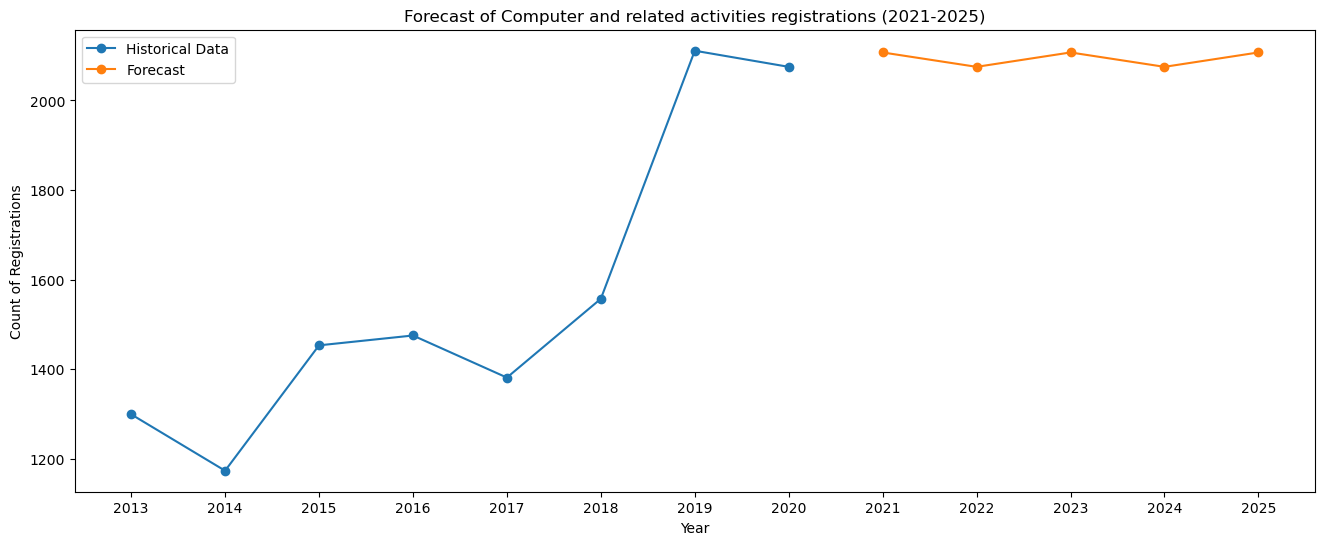

Forecasted registrations for Computer and related activities for 2021-2025:
2021-01-01    2107.130513
2022-01-01    2075.003474
2023-01-01    2107.127040
2024-01-01    2075.006947
2025-01-01    2107.123567
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

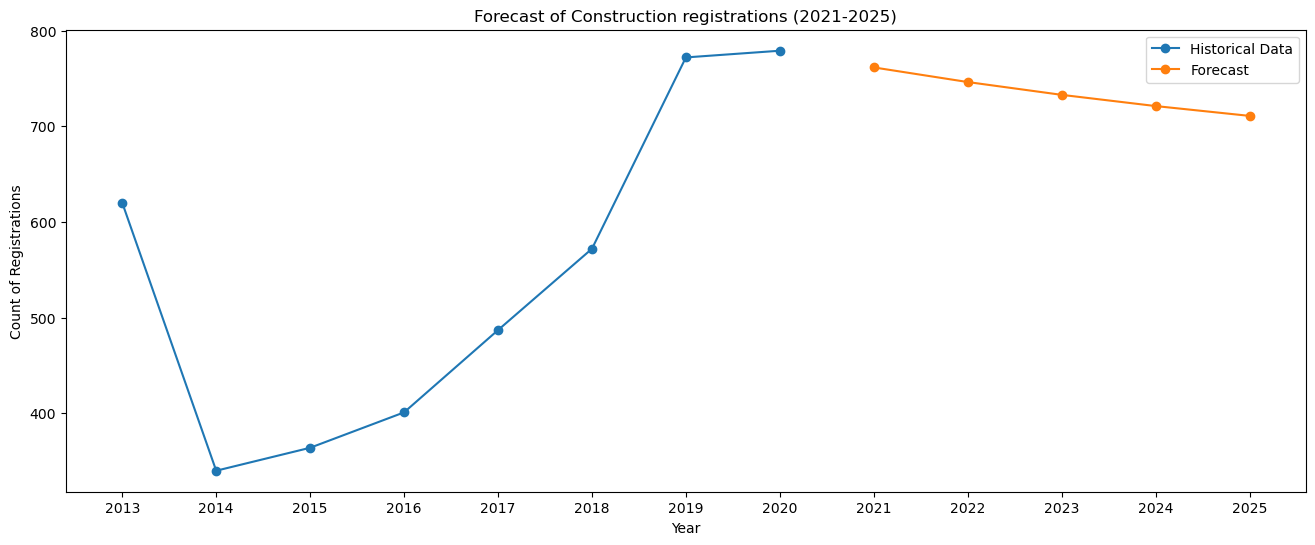

Forecasted registrations for Construction for 2021-2025:
2021-01-01    761.548869
2022-01-01    746.265970
2023-01-01    732.881911
2024-01-01    721.160768
2025-01-01    710.895929
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


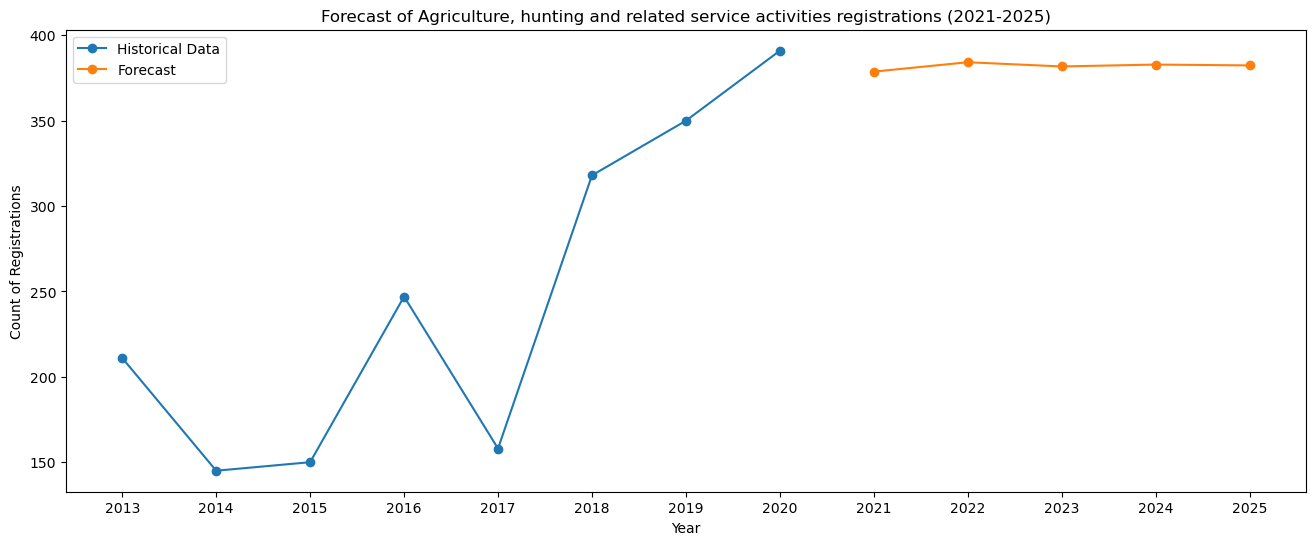

Forecasted registrations for Agriculture, hunting and related service activities for 2021-2025:
2021-01-01    378.750972
2022-01-01    384.256638
2023-01-01    381.781963
2024-01-01    382.894275
2025-01-01    382.394316
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

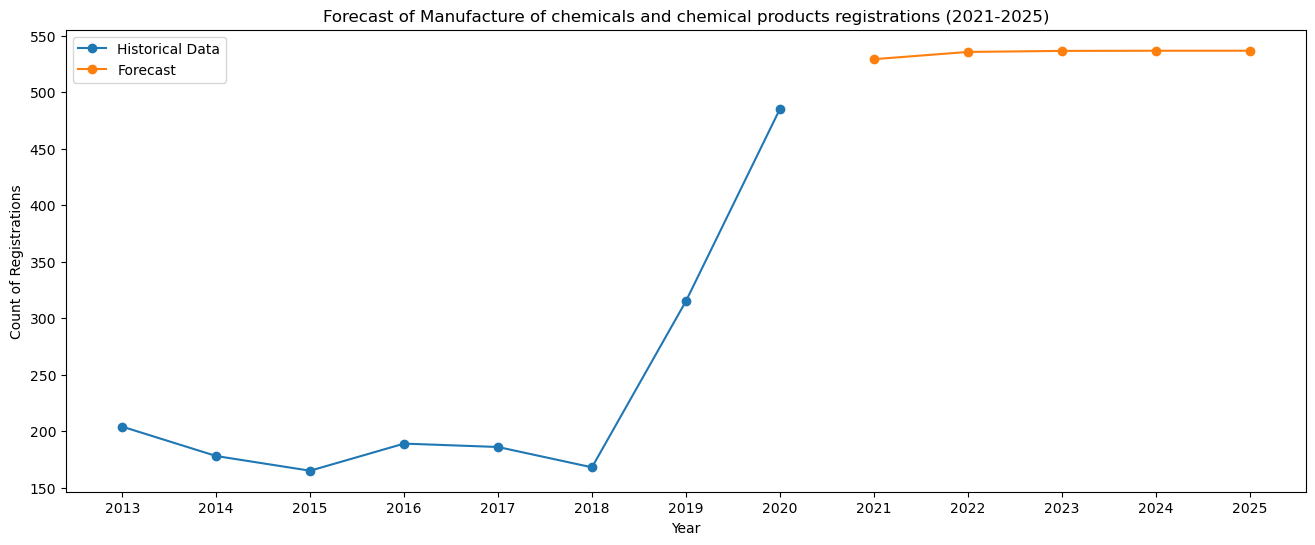

Forecasted registrations for Manufacture of chemicals and chemical products for 2021-2025:
2021-01-01    529.197797
2022-01-01    535.606537
2023-01-01    536.535813
2024-01-01    536.670559
2025-01-01    536.690097
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [30]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame
# Convert 'Latest_Year_AR' to datetime format
df['Latest_Year_AR'] = pd.to_datetime(df['Latest_Year_AR'], errors='coerce')

# Define the top 5 categories for forecasting
top_categories = [
    'Other business activities',
    'Computer and related activities',
    'Construction',
    'Agriculture, hunting and related service activities',
    'Manufacture of chemicals and chemical products'
]

# Loop through each category for forecasting
for category_to_forecast in top_categories:
    # Filter data for the specific category and the specified time range
    category_df = df[(df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] == category_to_forecast) & 
                     (df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

    # Extract relevant features and target variable
    X = category_df[['Registration_Year']]
    y = category_df.groupby('Registration_Year').size()

    # Convert 'Registration_Year' to DateTime format
    y.index = pd.to_datetime(y.index, format='%Y')

    # Fit ARIMA model
    model = ARIMA(y, order=(1, 1, 1))  # Adjust order as needed
    fit_model = model.fit()

    # Forecast registrations for the next 5 years (2021-2025)
    forecast_steps = 5
    forecast_values = fit_model.forecast(steps=forecast_steps)

    # Plot the forecast
    plt.figure(figsize=(16, 6))
    plt.plot(y.index.year, y.values, marker='o', label='Historical Data')
    plt.plot(range(y.index.year.max() + 1, y.index.year.max() + 1 + forecast_steps), forecast_values, marker='o', label='Forecast')
    plt.title(f'Forecast of {category_to_forecast} registrations (2021-2025)')
    plt.xticks(np.arange(2013, 2026, 1))
    plt.xlabel('Year')
    plt.ylabel('Count of Registrations')
    plt.legend()
    plt.show()

    # Display the forecasted values
    print(f"Forecasted registrations for {category_to_forecast} for 2021-2025:")
    print(forecast_values)